In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the Memory Usage of Broker-1
df1b = pd.read_csv("Brok1mem_usage.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-07-31 14:47:13,1811173376,my-cluster-metrics-kafka-0
1,2021-07-31 14:47:27,1833603072,my-cluster-metrics-kafka-0
2,2021-07-31 14:47:40,1857839104,my-cluster-metrics-kafka-0


In [8]:
#Average Memory Usage before rebalancing
membr1 = df1b[(df1b['timestamp'] >= '2021-07-31 14:47:13') & (df1b['timestamp'] <= '2021-07-31 15:17:11')]
membr1.head(3)
membr1avg = membr1['values'].mean()
print(membr1avg)
membr1.describe()

2479659059.630252


,values
count,1.190000e+02
mean,2.479659e+09
std,2.078501e+08
min,1.811173e+09
25%,2.526657e+09
50%,2.564194e+09
75%,2.584795e+09
max,2.633908e+09


In [9]:
#Average Memory Usage During rebalancing
memdr1 = df1b[(df1b['timestamp'] >= '2021-07-31 15:17:29') & (df1b['timestamp'] <= '2021-07-31 15:27:09')]
memdr1.head(3)
memdr1avg = memdr1['values'].mean()
print(memdr1avg)
memdr1.describe()

2627868122.5365853


,values
count,4.100000e+01
mean,2.627868e+09
std,2.918788e+07
min,2.576228e+09
25%,2.602570e+09
50%,2.628223e+09
75%,2.650247e+09
max,2.682221e+09


In [10]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1mem = ttest_ind(memdr1['values'], membr1['values'])
print(resb1mem)


Ttest_indResult(statistic=4.5412002261501785, pvalue=1.1038260508679205e-05)


In [11]:
membr1.drop(['pod'], axis=1, inplace=True)
membr1.head(10)
membr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  119 non-null    datetime64[ns]
 1   values     119 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
memdr1.drop(['pod'], axis=1, inplace=True)
memdr1.head(10)
memdr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 119 to 159
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  41 non-null     datetime64[ns]
 1   values     41 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 984.0 bytes


Text(0.5, 1.0, 'Broker1 Memory Usage')

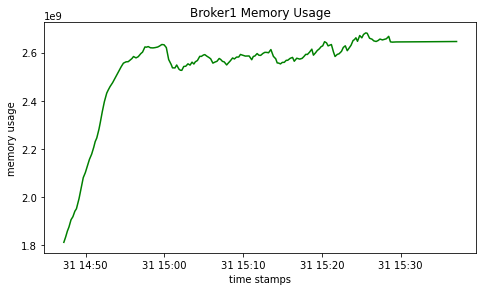

In [13]:
from datetime import datetime
#Memory Usage for the entire load test
m1=[]
for dat in df1b.timestamp:
    # print (dat)
    m1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(m1,df1b['values'], 'g')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('memory usage')
axe1.set_title('Broker1 Memory Usage')
#fig1.tight_layout()

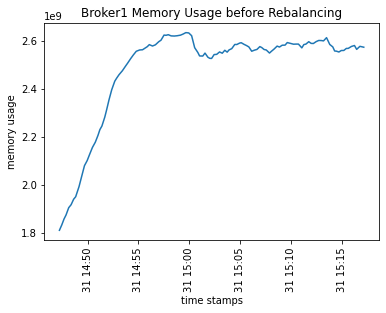

In [14]:
#Memory Usage before rebalancing
b=[]
for dat in membr1.timestamp:
    # print (dat)
    b.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b,membr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker1 Memory Usage before Rebalancing')
plt.show()

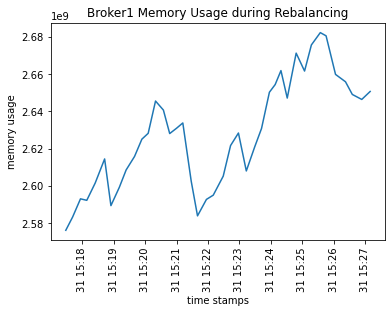

In [15]:
#Memory Usage during rebalancing
d=[]
for dat in memdr1.timestamp:
    # print (dat)
    d.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d,memdr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker1 Memory Usage during Rebalancing')
plt.show()

In [20]:
# DA on the Memory Usage of Broker-2
df2b = pd.read_csv("Brok2mem_usage.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-07-31 14:47:50,1752518656,my-cluster-metrics-kafka-1
1,2021-07-31 14:48:00,1768177664,my-cluster-metrics-kafka-1
2,2021-07-31 14:48:11,1780301824,my-cluster-metrics-kafka-1


In [21]:
#Average Memory Usage before rebalancing
membr2 = df2b[(df2b['timestamp'] >= '2021-07-31 14:47:50') & (df2b['timestamp'] <= '2021-07-31 15:17:13')]
membr2.head(3)
membr2avg = membr2['values'].mean()
print(membr2avg)
membr2.describe()

2439947685.647059


,values
count,1.190000e+02
mean,2.439948e+09
std,2.407431e+08
min,1.752519e+09
25%,2.378072e+09
50%,2.520682e+09
75%,2.619466e+09
max,2.652398e+09


In [22]:
#Average Memory Usage During rebalancing
memdr2 = df2b[(df2b['timestamp'] >= '2021-07-31 15:17:28') & (df2b['timestamp'] <= '2021-07-31 15:28:15')]
memdr2.head(3)
memdr2avg = memdr2['values'].mean()
print(memdr2avg)
memdr2.describe()

2581195252.6222224


,values
count,4.500000e+01
mean,2.581195e+09
std,3.946893e+07
min,2.520887e+09
25%,2.541457e+09
50%,2.585223e+09
75%,2.611831e+09
max,2.661159e+09


In [23]:
#T-Stats Analysis
resb2mem = ttest_ind(memdr2['values'], membr2['values'])
print(resb1mem)

Ttest_indResult(statistic=4.5412002261501785, pvalue=1.1038260508679205e-05)


In [24]:
membr2.drop(['pod'], axis=1, inplace=True)
membr2.head(10)
membr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  119 non-null    datetime64[ns]
 1   values     119 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
memdr2.drop(['pod'], axis=1, inplace=True)
memdr2.head(10)
memdr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 119 to 163
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  45 non-null     datetime64[ns]
 1   values     45 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


Text(0.5, 1.0, 'Broker2 Memory Usage')

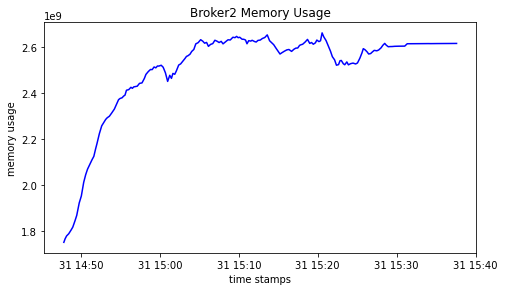

In [26]:
from datetime import datetime
#Memory Usage for the entire load test
m2=[]
for dat in df2b.timestamp:
    # print (dat)
    m2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(m2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('memory usage')
axe2.set_title('Broker2 Memory Usage')
#fig1.tight_layout()

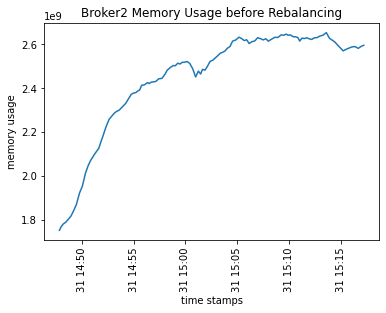

In [27]:
#Memory Usage before rebalancing
b2=[]
for dat in membr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,membr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker2 Memory Usage before Rebalancing')
plt.show()

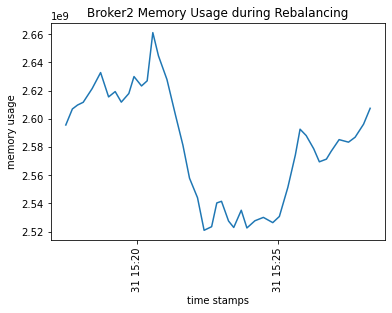

In [30]:
#Memory Usage during rebalancing
d2=[]
for dat in memdr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,memdr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker2 Memory Usage during Rebalancing')
plt.show()

In [37]:
# DA on the Memory Usage of Broker-3
df3b = pd.read_csv("Brok3mem_usage.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-07-31 14:48:44,1866473472,my-cluster-metrics-kafka-2
1,2021-07-31 14:49:04,1898659840,my-cluster-metrics-kafka-2
2,2021-07-31 14:49:21,1939501056,my-cluster-metrics-kafka-2


In [38]:
#Average Memory Usage before rebalancing
membr3 = df3b[(df3b['timestamp'] >= '2021-07-31 14:48:44') & (df3b['timestamp'] <= '2021-07-31 15:17:13')]
membr3.head(3)
membr3avg = membr3['values'].mean()
print(membr3avg)
membr3.describe()

2228045731.747748


,values
count,1.110000e+02
mean,2.228046e+09
std,8.235569e+07
min,1.866473e+09
25%,2.212334e+09
50%,2.252009e+09
75%,2.277792e+09
max,2.324050e+09


In [46]:
#Average Memory Usage During rebalancing
memdr3 = df3b[(df3b['timestamp'] >= '2021-07-31 15:17:28') & (df3b['timestamp'] <= '2021-07-31 15:28:27')]
memdr3.head(3)
memdr3avg = memdr3['values'].mean()
print(memdr3avg)
memdr3.describe()

2283432800.711111


,values
count,4.500000e+01
mean,2.283433e+09
std,2.991612e+07
min,2.225451e+09
25%,2.260423e+09
50%,2.289836e+09
75%,2.306343e+09
max,2.336686e+09


In [40]:
#T-Stats Analysis
resb3mem = ttest_ind(memdr3['values'], membr3['values'])
print(resb3mem)


Ttest_indResult(statistic=4.388489456859762, pvalue=2.1090417861816305e-05)


In [41]:
membr3.drop(['pod'], axis=1, inplace=True)
membr3.head(10)
membr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  111 non-null    datetime64[ns]
 1   values     111 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.6 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
memdr3.drop(['pod'], axis=1, inplace=True)
memdr3.head(10)
memdr3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 111 to 155
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  45 non-null     datetime64[ns]
 1   values     45 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


Text(0.5, 1.0, 'Broker3 Memory Usage')

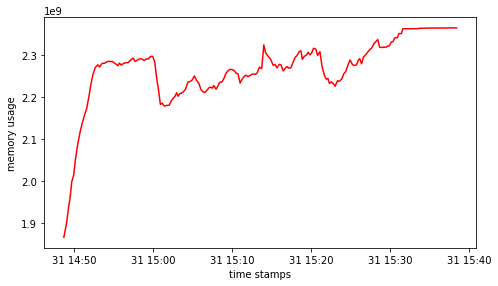

In [43]:
from datetime import datetime
#Memory Usage for the entire load test
m3=[]
for dat in df3b.timestamp:
    # print (dat)
    m3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(m3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('memory usage')
axe2.set_title('Broker3 Memory Usage')
#fig1.tight_layout()

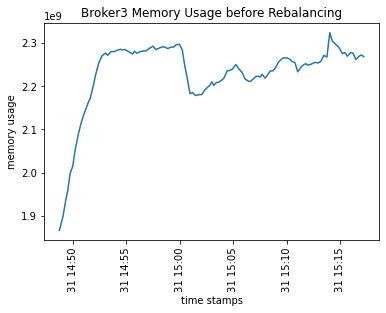

In [44]:
#Memory Usage before rebalancing
b3=[]
for dat in membr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,membr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker3 Memory Usage before Rebalancing')
plt.show()

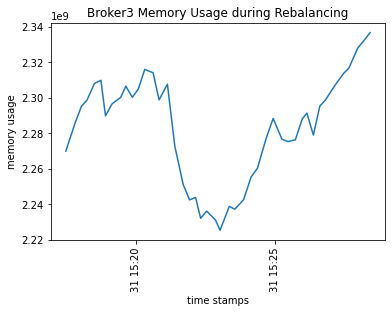

In [45]:
#Memory Usage during rebalancing
d3=[]
for dat in memdr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,memdr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker3 Memory Usage during Rebalancing')
plt.show()